<a href="https://colab.research.google.com/github/RiyaGupta-prog/Task-5/blob/main/Task_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Decision Tree and Random Forest**

# **Import** **Libarires**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


# **Load Dataset**

In [2]:
df = pd.read_csv("/content/heart.csv")
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


# **Split Feature and Target**

In [3]:
X = df.drop('target', axis=1)
y = df['target']


# **Train Test split**

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# **Decision Tree with Depth Control**

In [5]:
# Limit max_depth to prevent overfitting
dt_model = DecisionTreeClassifier(max_depth=4, random_state=42)
dt_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_dt = dt_model.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)

print("Decision Tree Accuracy:", accuracy_dt)
print("\nDecision Tree Classification Report:\n")
print(classification_report(y_test, y_pred_dt))


Decision Tree Accuracy: 0.8

Decision Tree Classification Report:

              precision    recall  f1-score   support

           0       0.88      0.70      0.78       102
           1       0.75      0.90      0.82       103

    accuracy                           0.80       205
   macro avg       0.81      0.80      0.80       205
weighted avg       0.81      0.80      0.80       205



# **Visualize the Decision Tree**

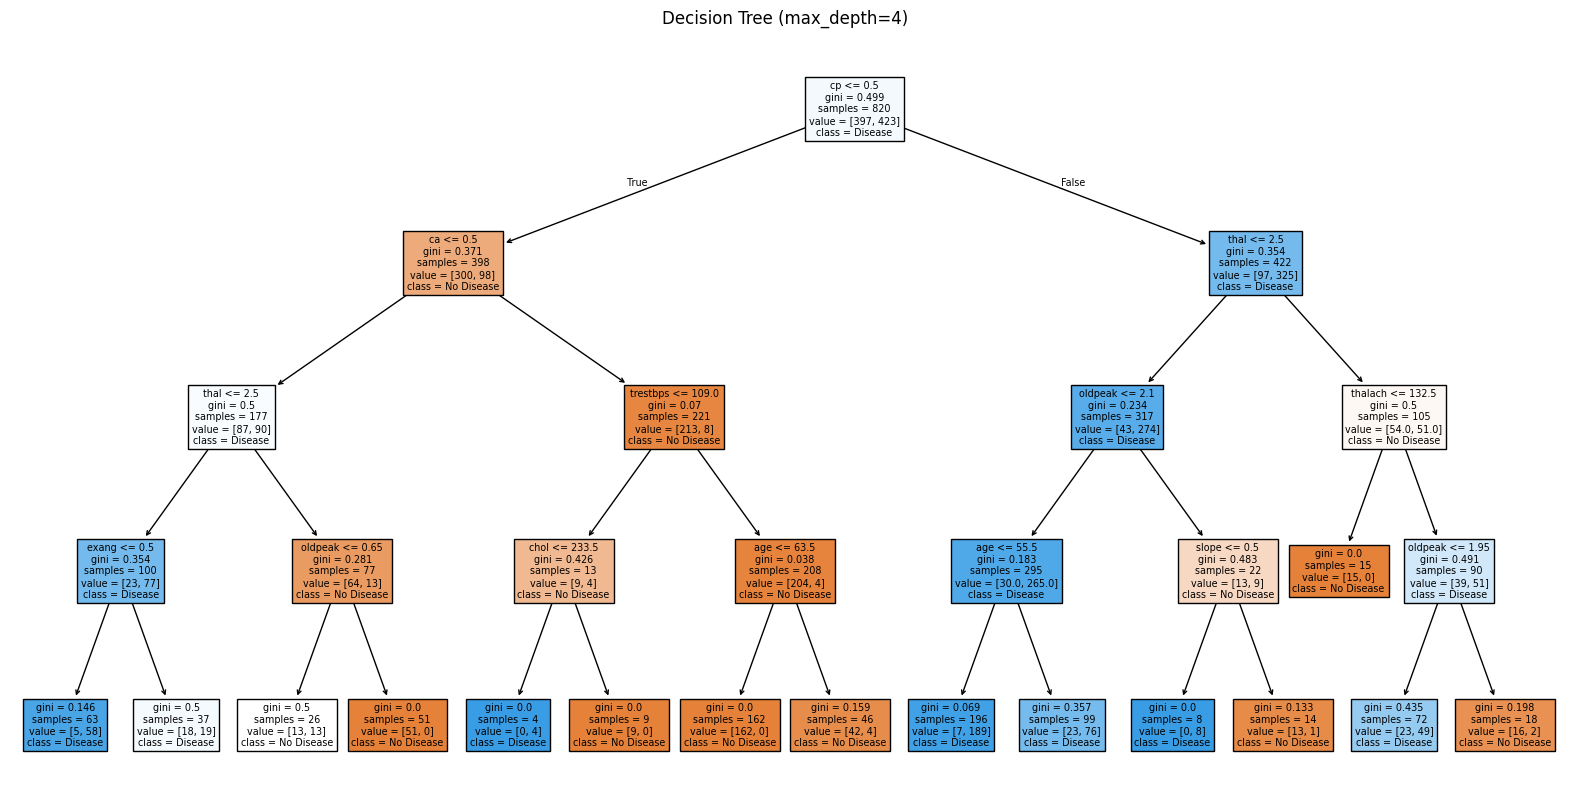

In [6]:
plt.figure(figsize=(20, 10))
plot_tree(dt_model,
          feature_names=X.columns,
          class_names=["No Disease", "Disease"],
          filled=True)
plt.title("Decision Tree (max_depth=4)")
plt.show()


# **Train Random Forest Classifier**

In [7]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_rf = rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

print("Random Forest Accuracy:", accuracy_rf)
print("\nRandom Forest Classification Report:\n")
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.9853658536585366

Random Forest Classification Report:

              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



# **Feature Importace(Random Forest)**

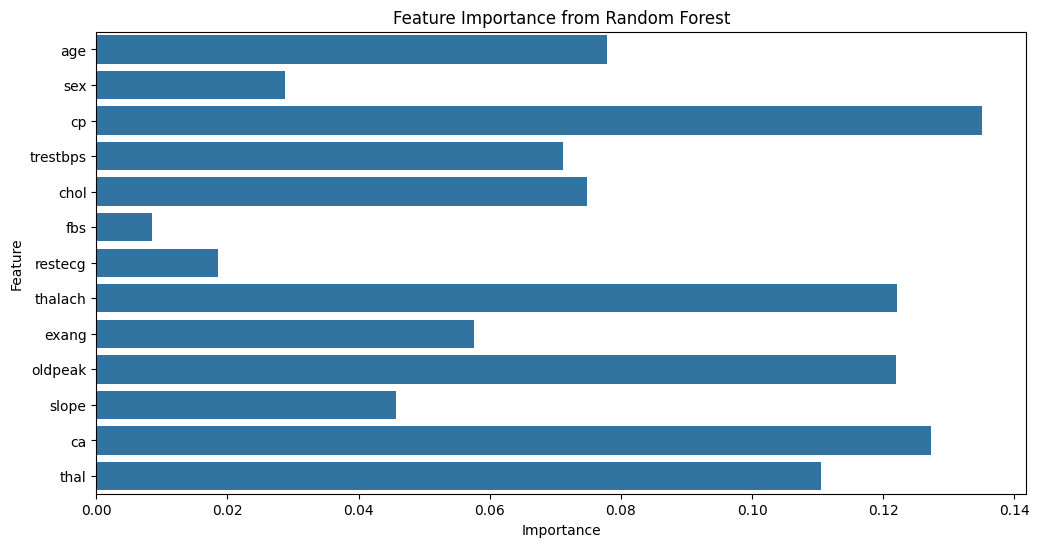

In [8]:
importances = rf_model.feature_importances_
features = X.columns

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=importances, y=features)
plt.title("Feature Importance from Random Forest")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()


# **Cross-Valdation Comprison**

In [9]:
# Cross-validation for Decision Tree
scores_dt = cross_val_score(dt_model, X, y, cv=5)
print("Decision Tree Cross-Validation Accuracy: ", scores_dt.mean())

# Cross-validation for Random Forest
scores_rf = cross_val_score(rf_model, X, y, cv=5)
print("Random Forest Cross-Validation Accuracy: ", scores_rf.mean())


Decision Tree Cross-Validation Accuracy:  0.8341463414634147
Random Forest Cross-Validation Accuracy:  0.9970731707317073
